In [157]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [158]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [159]:
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['font.size'] = 50
mpl.rcParams['figure.figsize'] =  15,10
mpl.rcParams['axes.labelsize'] = 50
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

In [160]:
import numpy as np

In [231]:
data = np.loadtxt('Data-GT/Whitewine/results_to_plot',delimiter='	')

In [232]:
data.shape

(20, 5)

In [163]:
data[:,0]

array([3.91883442, 4.47809377, 5.24150172, 5.41960329, 0.27254667,
       3.66741144, 4.56800721, 5.12396084, 5.42149224, 0.25863306,
       5.38156795])

In [233]:
labels = []
with open('Data-GT/Whitewine/all_labels') as fs:
    for line in fs:
        labels.append(line.strip())

In [234]:
labels

['ral1AV',
 'ral1CO',
 'ral1KM',
 'ral1SI',
 'ral2AV',
 'ral2CO',
 'ral2KM',
 'ral2SI',
 'rwl1AP',
 'rwl1AV',
 'rwl1CO',
 'rwl1KM',
 'rwl1SI',
 'rwl2AP',
 'rwl2AV',
 'rwl2CO',
 'rwl2KM',
 'rwl2SI',
 'raBI',
 'rwBI']

In [166]:
data[:,2]

array([0.16388262, 0.18148984, 0.19367946, 0.2       , 0.1255079 ,
       0.16162528, 0.1778781 , 0.19503386, 0.19909707, 0.1241535 ,
       0.19232506])

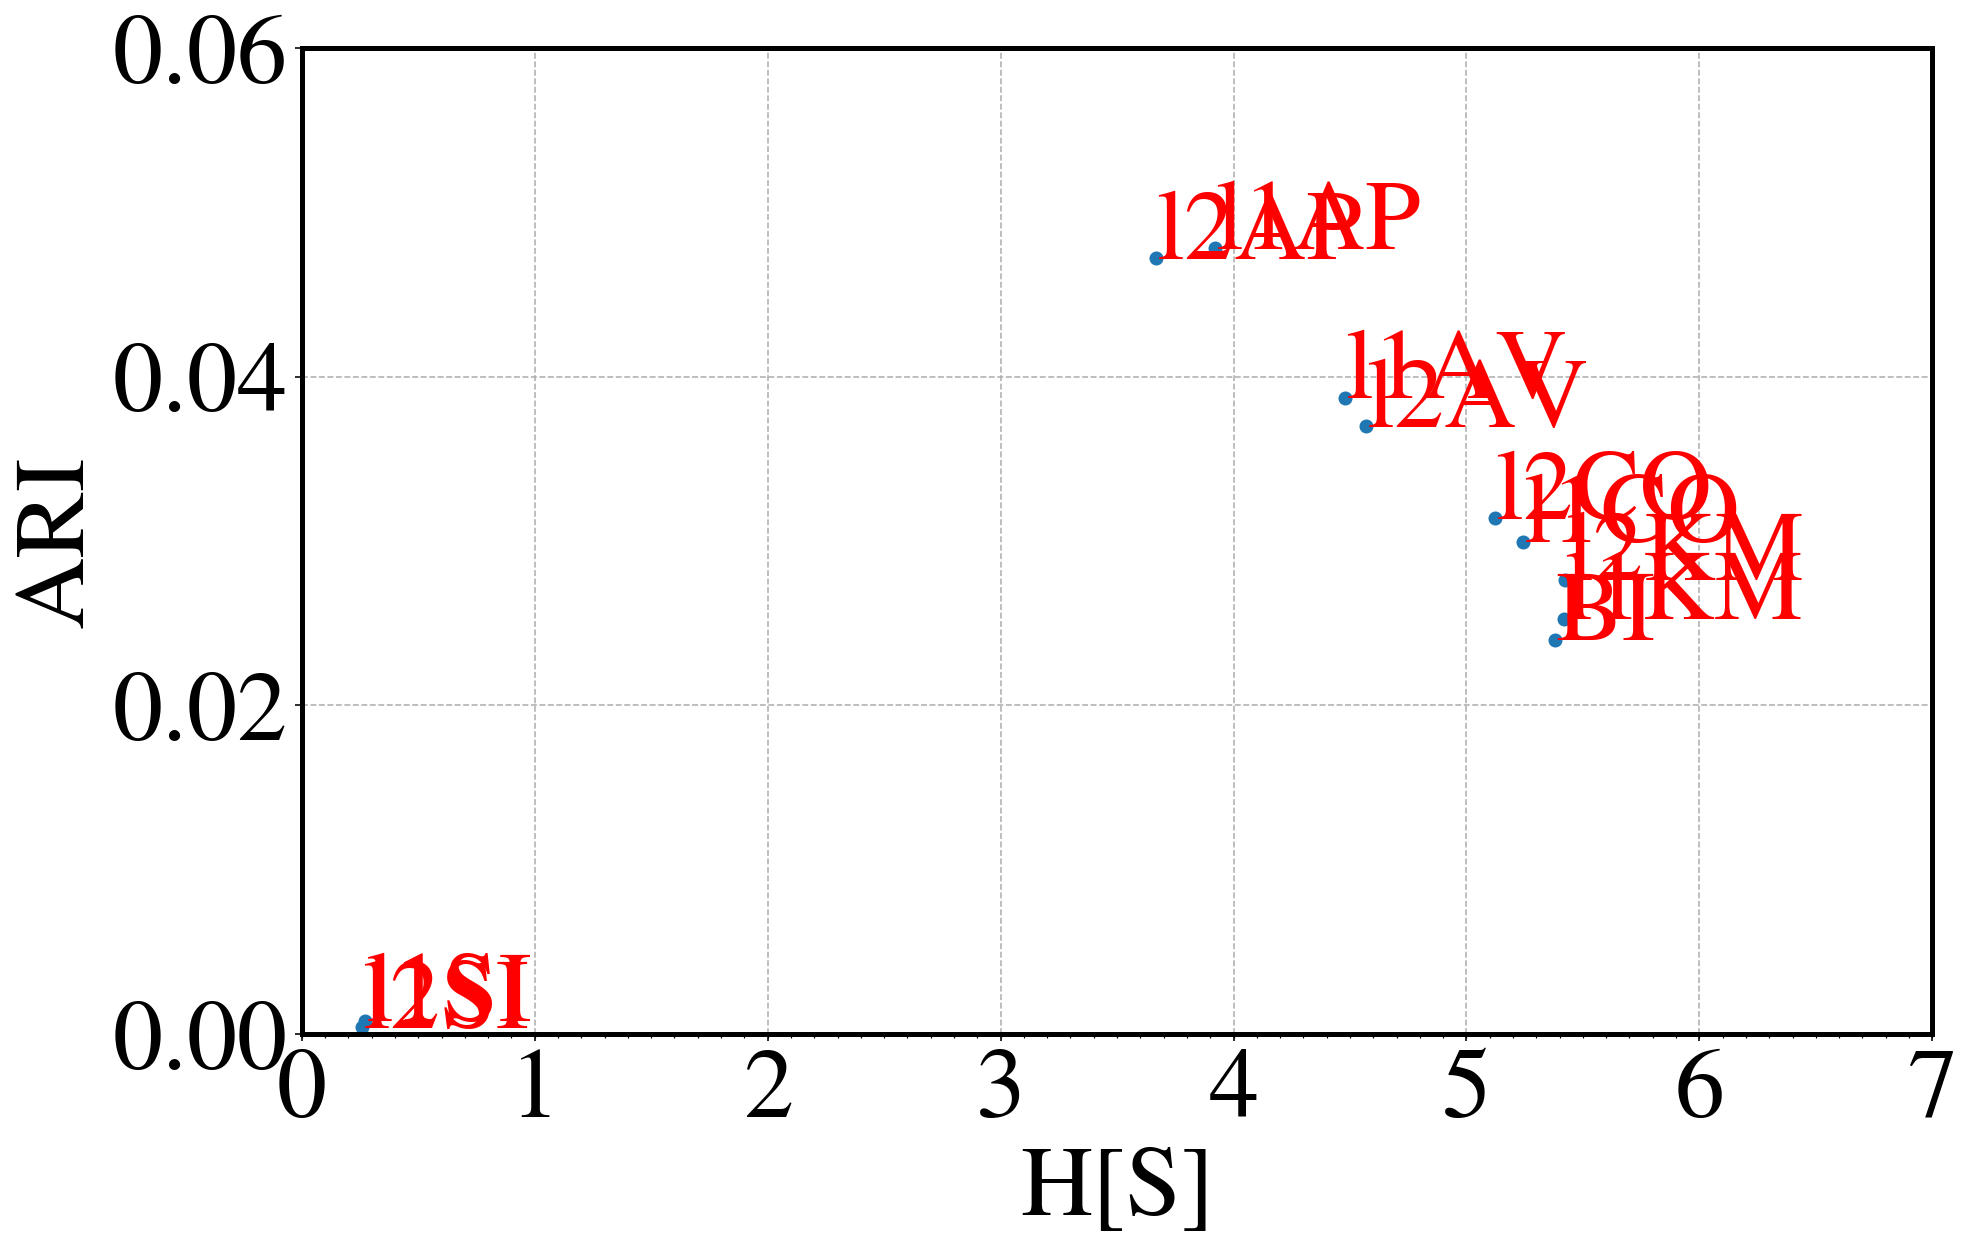

In [175]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(0,0.06)
y_pos = np.arange(0,0.08,step = 0.02)
ax.set_yticks(y_pos)
plt.xlim(0,7)
plt.ylabel('ARI')
plt.xlabel('H[S]')

ax.scatter(data[:,0],data[:,4])

for i, txt in enumerate(labels):
    ax.annotate(txt, (data[i,0], data[i,4]), color='r', fontsize=50)

plt.tight_layout()
plt.savefig('plots/crime_robr_ARI.pdf',dpi=200)    

In [189]:
from matplotlib.lines import Line2D

In [196]:
custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

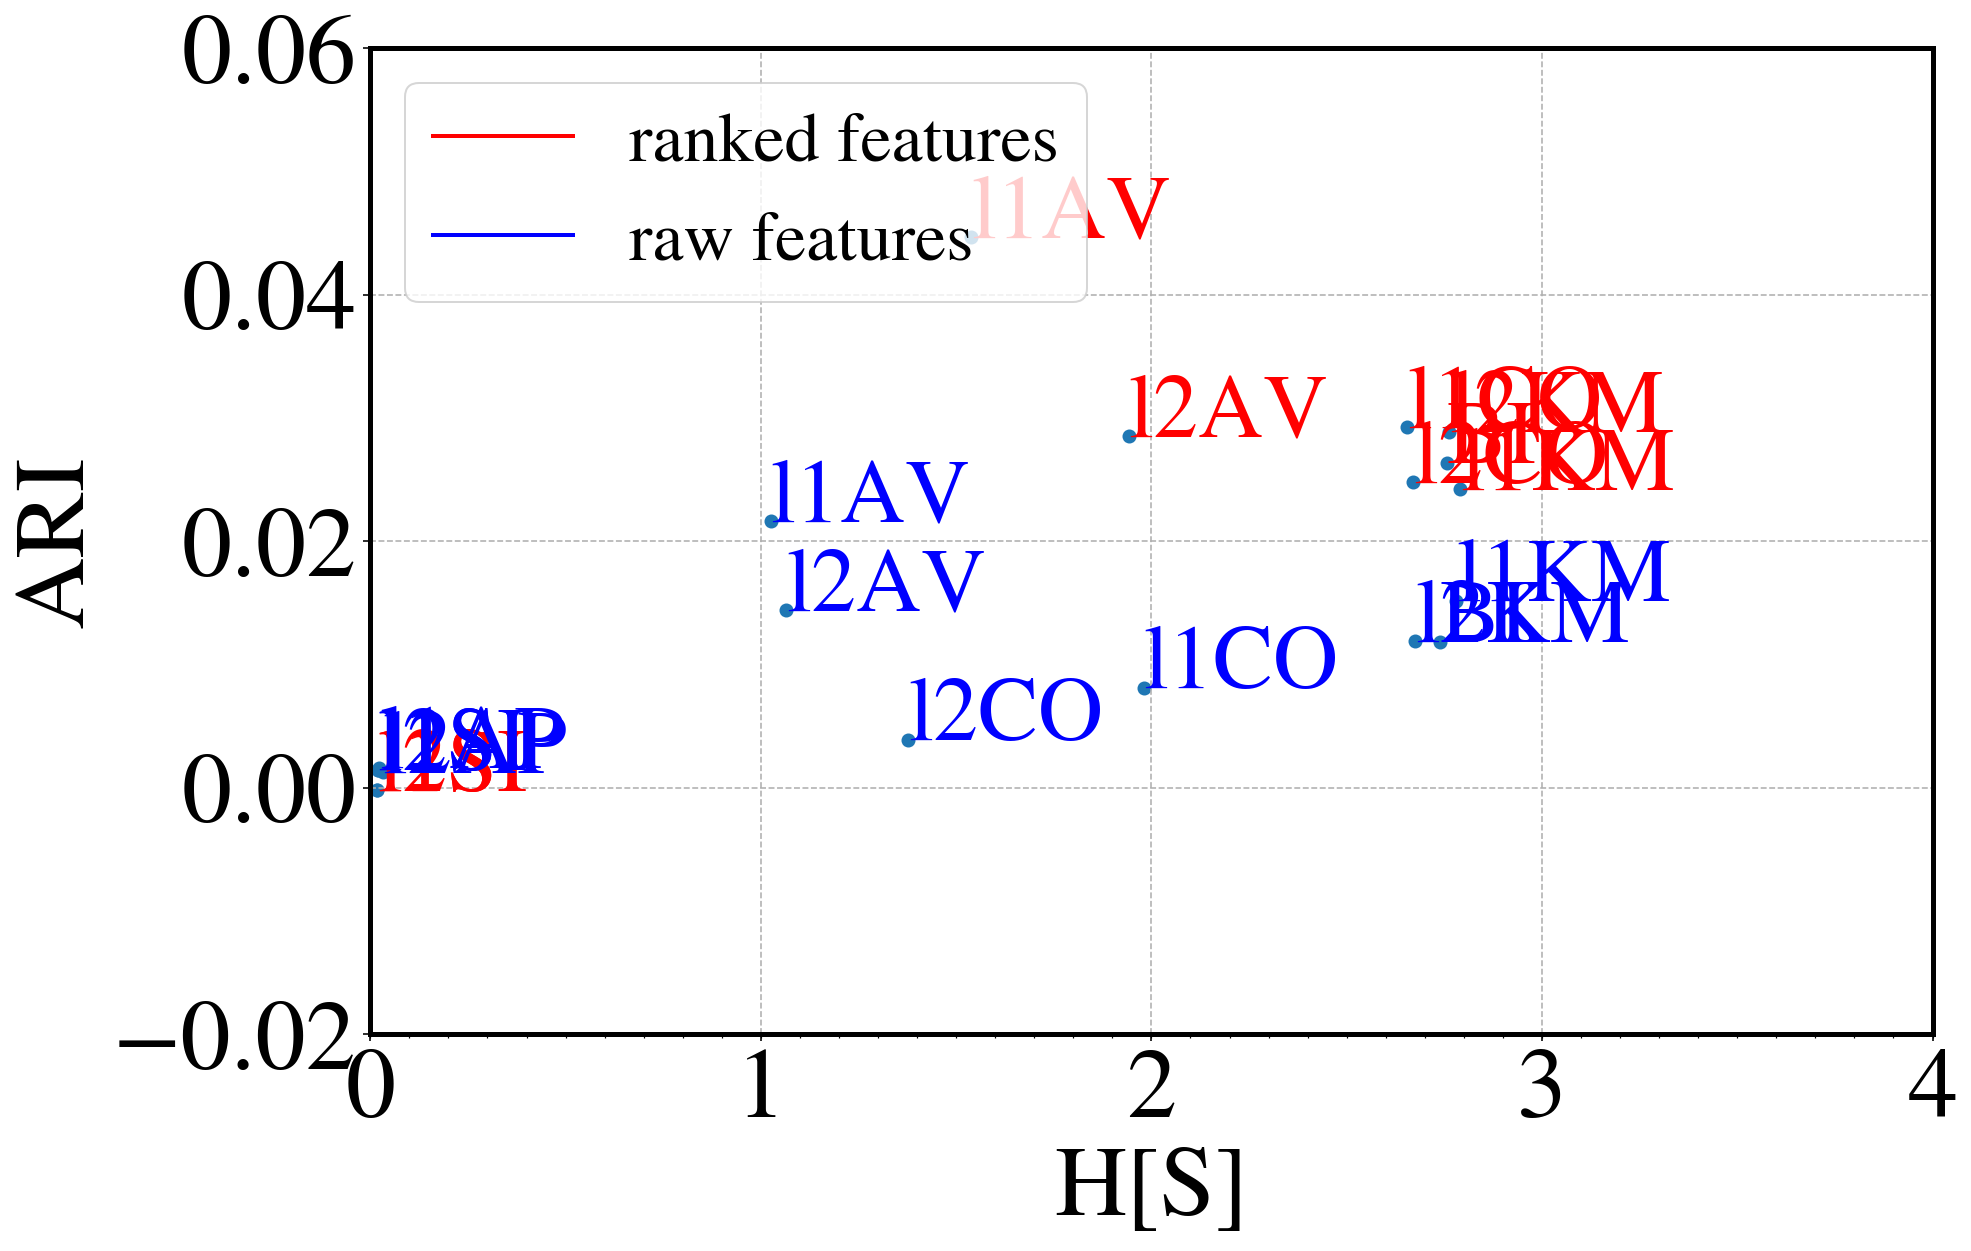

In [242]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.02,0.06)
y_pos = np.arange(-0.02,0.08,step = 0.02)
ax.set_yticks(y_pos)
plt.xlim(0,4)
x_pos = np.arange(0,5,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['ranked features', 'raw features'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4])

for i, txt in enumerate(labels):
    if 'rw' in txt:
        ax.annotate(txt.replace('rw',''), (data[i,0], data[i,4]), color='b', fontsize=45)
    else:
        ax.annotate(txt.replace('ra',''), (data[i,0], data[i,4]), color='r', fontsize=45)

plt.tight_layout()
plt.savefig('plots/whitewine_ARI.pdf',dpi=200)    